In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from few_shot import *

In [2]:
result = pd.read_csv('./test_results.csv')

In [ ]:
result[result['cls_freeze'].isna()]

In [ ]:
task_list = ['readmission', 'mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

result_file = result
source_file = 'eicu'
test_file = 'mimic'
bert_model = 'bio_bert'
item = 'med'
concat = True
cls_freeze = False

for task in task_list:
    # narrow down the dataset
    few_shot_sample = result_file[result_file['bert_model'] == bert_model]
    few_shot_sample = few_shot_sample[few_shot_sample['target'] == task]
    few_shot_sample = few_shot_sample[few_shot_sample['item'] == item]
    few_shot_sample = few_shot_sample[few_shot_sample['concat'] == concat]
    few_shot_sample = few_shot_sample[few_shot_sample['test_file'] == test_file]
    few_shot_sample = few_shot_sample[few_shot_sample['cls_freeze'] != True]
    test2test_sample = few_shot_sample[few_shot_sample['source_file'] == test_file]
    few_shot_sample = few_shot_sample[few_shot_sample['source_file'] == source_file]

    # test auprc for each few shot ratio
    zero_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 0].test_auprc.values.tolist())
    one_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 0.1].test_auprc.values.tolist())
    three_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 0.3].test_auprc.values.tolist())
    five_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 0.5].test_auprc.values.tolist())
    seven_shot = np.array(np.array(few_shot_sample[few_shot_sample['few_shot'] == 0.7].test_auprc.values.tolist()))
    nine_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 0.9].test_auprc.values.tolist())
    full_shot = np.array(few_shot_sample[few_shot_sample['few_shot'] == 1].test_auprc.values.tolist())
    assert len(zero_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(one_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(three_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(five_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(seven_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(nine_shot) == 10, "check the number of experiments, it exceeds 10"
    assert len(full_shot) == 10, "check the number of experiments, it exceeds 10"

    # test2test value (baseline)
    test2test = np.array(test2test_sample.test_auprc.values.tolist())
    assert len(test2test) == 10, "check the number of experiments, it exceeds 10."

    # plot the result
    x_axis = np.array([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    mean_value = np.array([np.mean(zero_shot), np.mean(one_shot), np.mean(three_shot), np.mean(five_shot),
                           np.mean(seven_shot), np.mean(nine_shot), np.mean(full_shot)])

    std_value = np.array([np.std(zero_shot), np.std(one_shot), np.std(three_shot), np.std(five_shot),
                          np.std(seven_shot), np.std(nine_shot), np.std(full_shot)])

    # mean
    ax.plot(x_axis, mean_value, color='darkblue', label='{}->{}'.format(source_file, test_file))
    # std
    ax.plot(x_axis, std_value + mean_value, color='lavender')
    ax.plot(x_axis, mean_value - std_value, color='lavender')
    plt.fill_between(x_axis, mean_value + std_value, mean_value - std_value, facecolor='lavender')

    # test2test
    ax.plot(x_axis, np.array([np.mean(test2test)] * 7), label='{}->{}'.format(test_file, test_file), color='red')

    ax.set_xticks(x_axis, minor=False)
    ax.grid(which='major', axis='x')
    ax.grid(which='major', axis='y')

    plt.title('{}_{}_{}_{}'.format(task, item, concat, 'test AUPRC'))

    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

In [ ]:
t

In [ ]:
len(zero_shot)

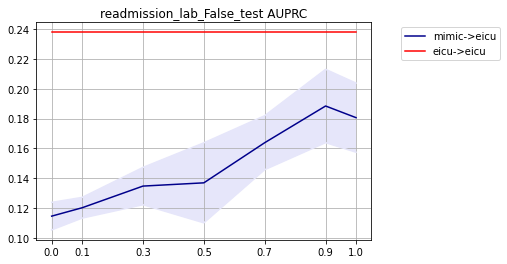

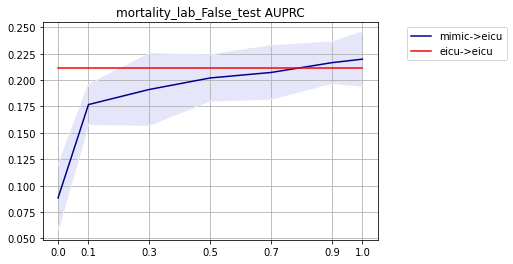

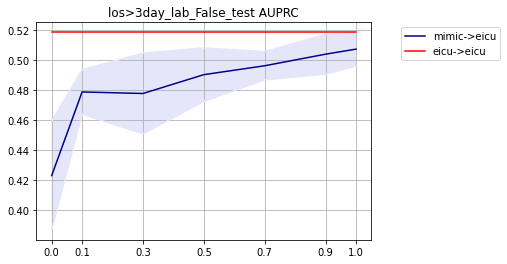

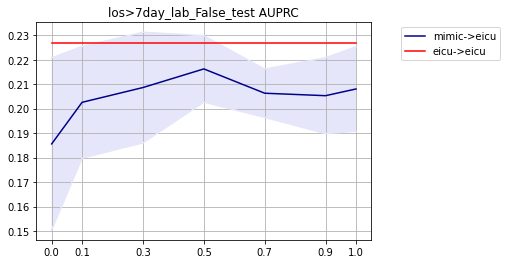

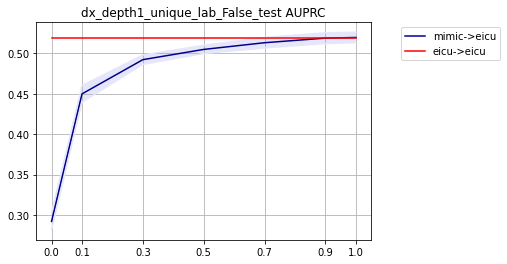

In [5]:
visualize_fewshot(result_file=result, source_file='mimic', test_file='eicu', bert_model='bio_bert', item='lab', 
                  concat=False, cls_freeze=False)

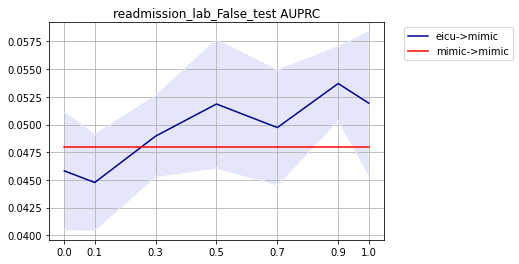

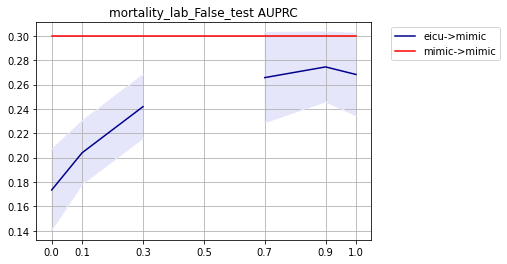

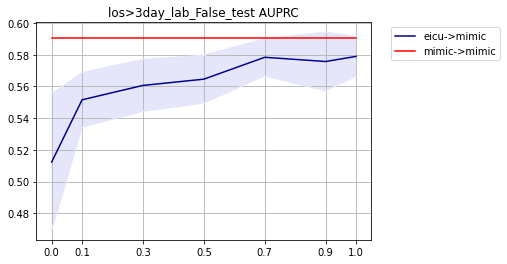

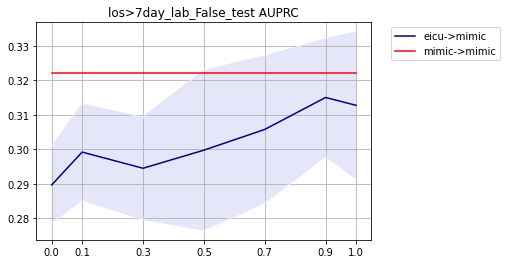

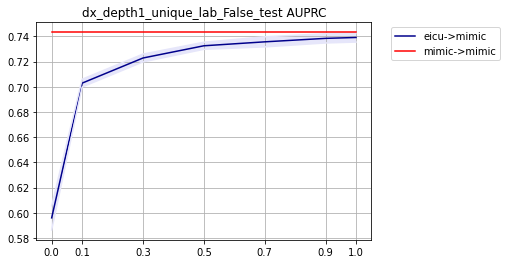

In [7]:
visualize_fewshot(result_file=result, source_file='eicu', test_file='mimic', bert_model='bio_bert', item='lab', 
                  concat=False, cls_freeze=False)

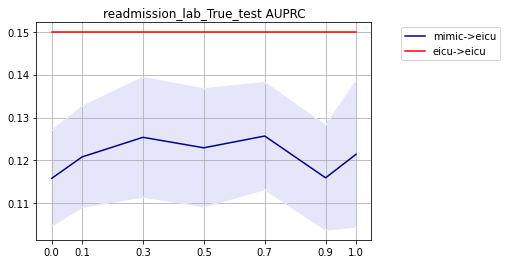

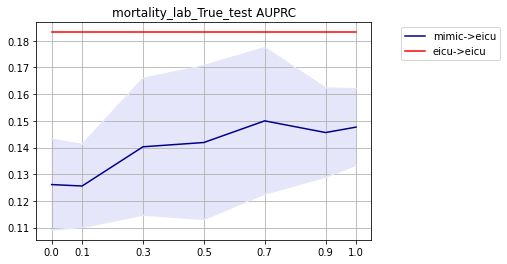

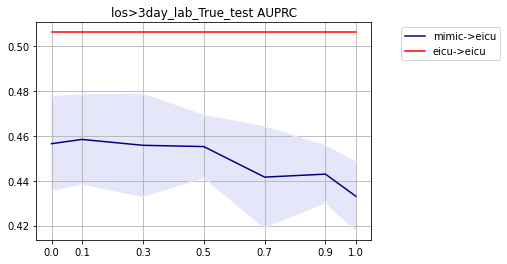

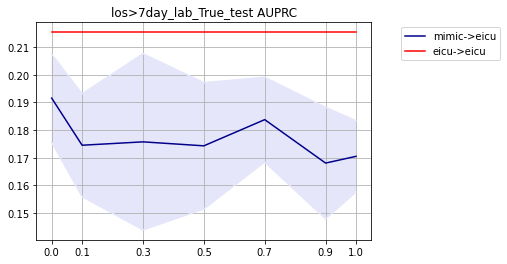

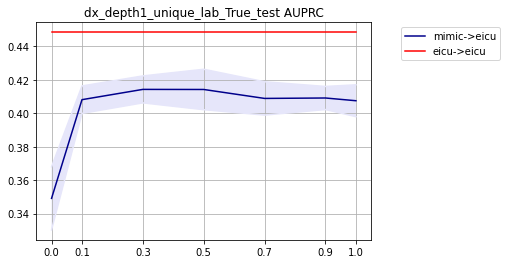

In [8]:
visualize_fewshot(result_file=result, source_file='mimic', test_file='eicu', bert_model='bio_bert', item='lab',
                  concat=True, cls_freeze=False)

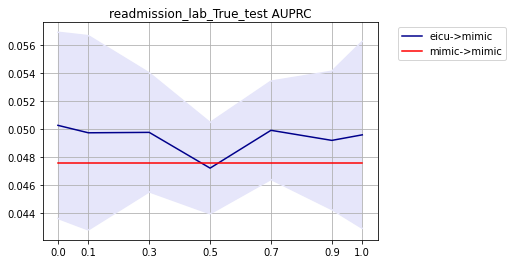

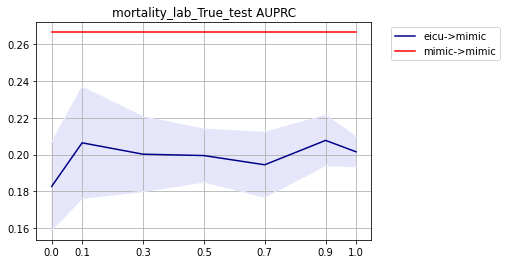

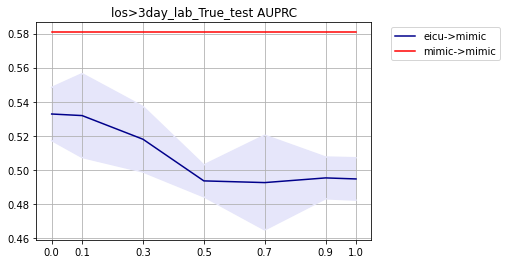

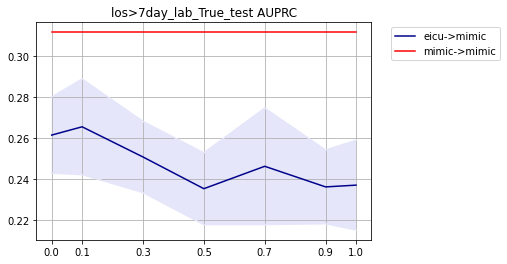

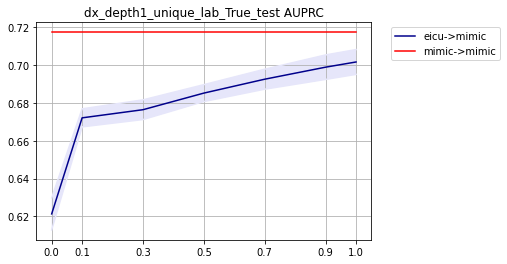

In [9]:
visualize_fewshot(result_file=result, source_file='eicu', test_file='mimic', bert_model='bio_bert', item='lab',
                  concat=True, cls_freeze=False)

/home/jylee/anaconda3/envs/pretrained_ehr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jylee/anaconda3/envs/pretrained_ehr/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jylee/anaconda3/envs/pretrained_ehr/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jylee/anaconda3/envs/pretrained_ehr/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/jylee/anaconda3/envs/pretrained_ehr/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


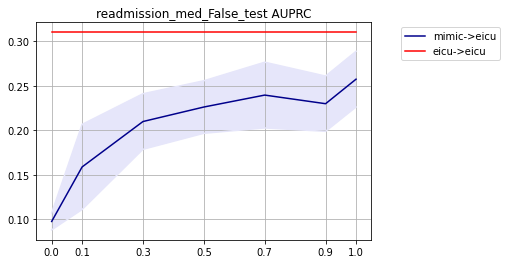

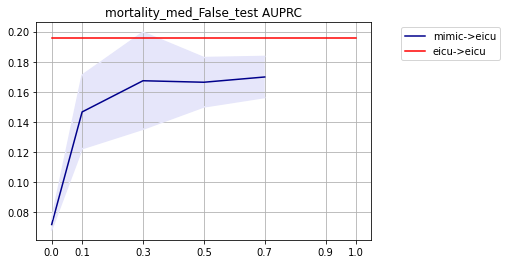

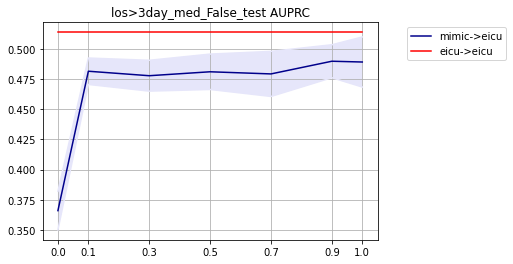

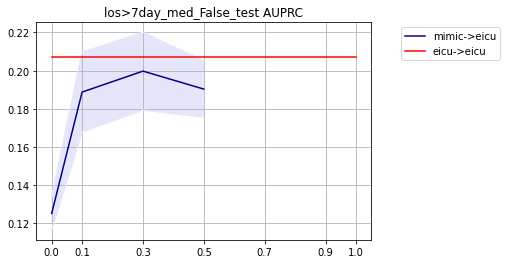

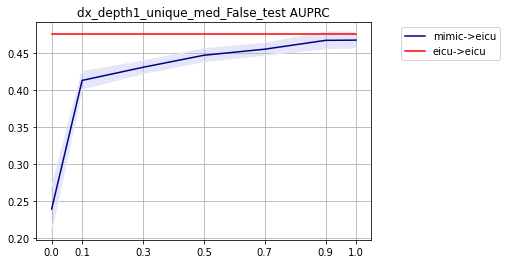

In [10]:
visualize_fewshot(result_file=result, source_file='mimic', test_file='eicu', bert_model='bio_bert', item='med',
                  concat=False, cls_freeze=False)

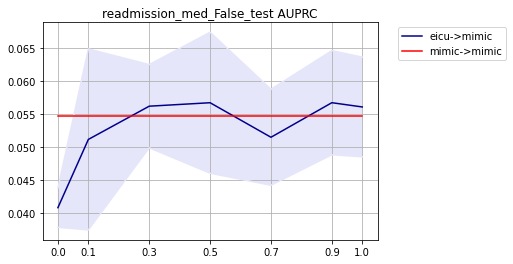

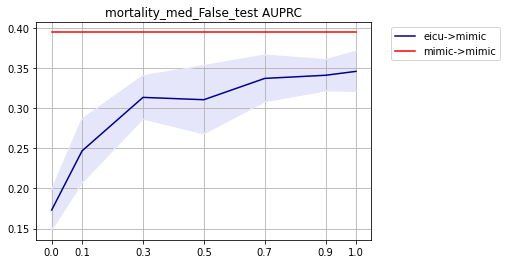

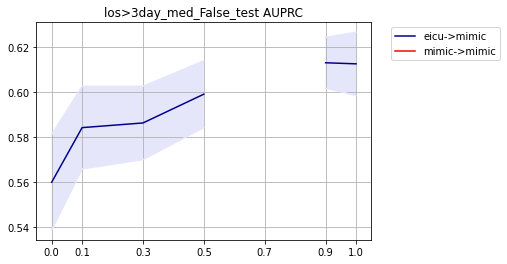

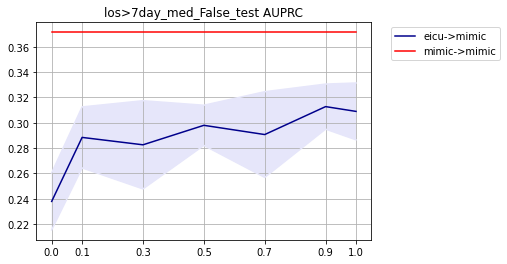

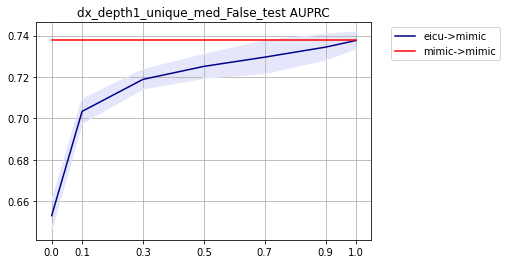

In [11]:
visualize_fewshot(result_file=result, source_file='eicu', test_file='mimic', bert_model='bio_bert', item='med',
                  concat=False, cls_freeze=False)

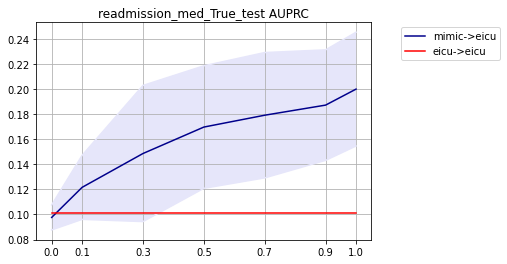

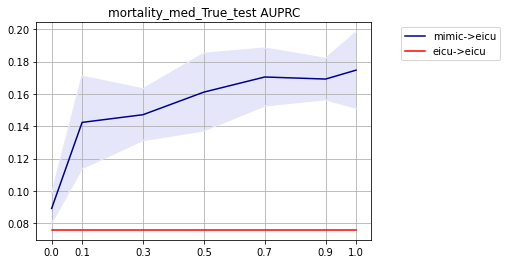

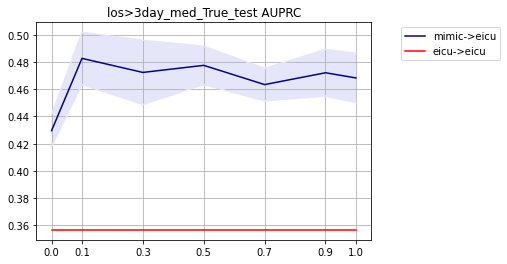

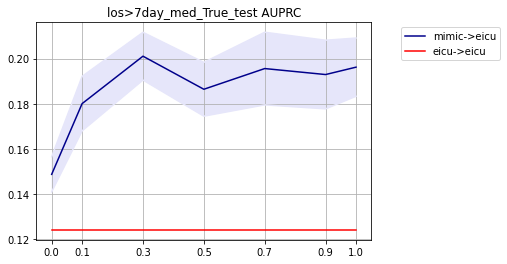

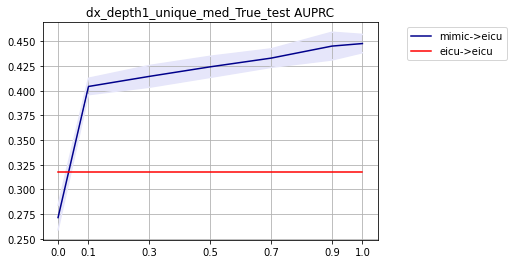

In [12]:
visualize_fewshot(result_file=result, source_file='mimic', test_file='eicu', bert_model='bio_bert', item='med',
                  concat=True, cls_freeze=False)

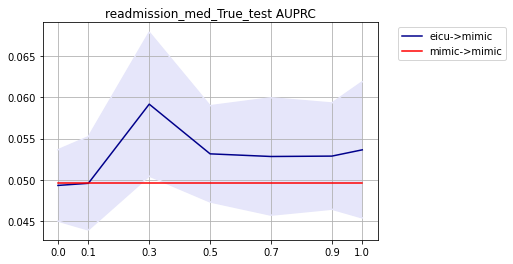

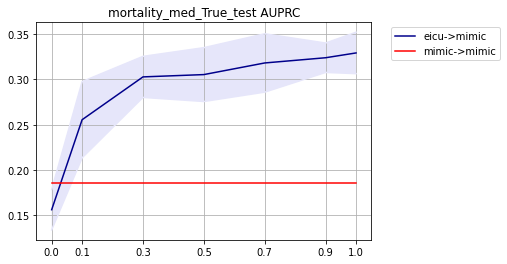

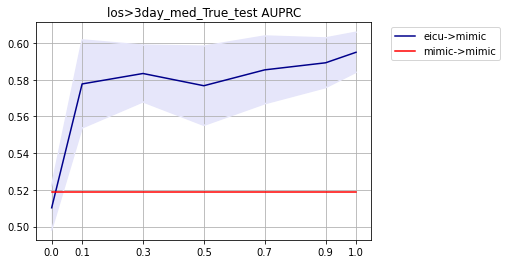

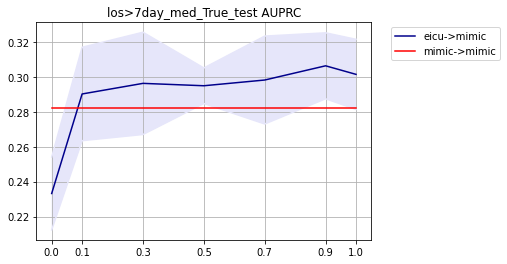

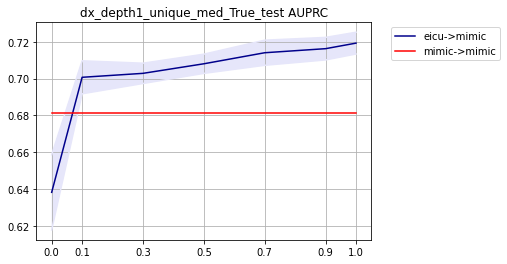

In [13]:
visualize_fewshot(result_file=result, source_file='eicu', test_file='mimic', bert_model='bio_bert', item='med',
                  concat=True, cls_freeze=False)